# The Equation coordinates for the Rods
$$ x_1	=  L_1sin⁡θ_1  $$
  $$ y_1	= −L_1cos⁡θ_1  $$
  $$ x_2	=  x_1+L_2sin⁡θ_2$$
  $$ y_2	=  y_1−L_2cos⁡θ_2$$


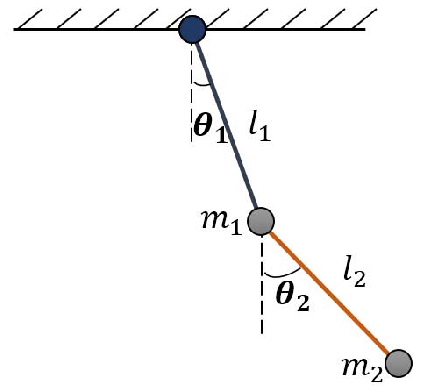

In [47]:
import sympy as sp
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


In [48]:
import sympy as sp

t = sp.symbols('t') # t is not just a symbol, it's the independent variable

theta1 = sp.Function('theta1')(t) # theta1 and theta2 are functions of time
theta2 = sp.Function('theta2')(t)


In [49]:
m1, m2 = sp.symbols('m1 m2')
L1, L2 = sp.symbols('L1 L2')
g = sp.symbols('g')
# First derivatives

In [ ]:
x1 = L1 * sp.sin(theta1)
y1 = -L1 * sp.cos(theta1)
x2 = x1 + L2 * sp.sin(theta2)
y2 = y1 - L2 * sp.cos(theta2)
   #defining positSions

In [51]:
dx1 = sp.diff(x1, t)
dy1 = sp.diff(y1, t)

dx2 = sp.diff(x2, t)
dy2 = sp.diff(y2, t)
 # Defining velocities

* Now we define The ' T ' and ' U ' for the Lagrangian *

In [52]:
# Kinetic Energy (T)
T = sp.Rational(1,2)*m1*(dx1**2 + dy1**2)+ sp.Rational(1,2)*m2*(dx2**2 + dy2**2)

In [53]:
U = m1*g*y1 + m2*g*y2
# Potential Energy (U)

In [54]:
L = T - U

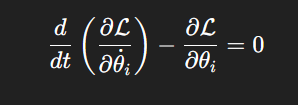

In [55]:
theta1_dot = sp.diff(theta1, t)
theta2_dot = sp.diff(theta2, t)

In [56]:
sp.diff(sp.diff(L,theta1_dot),t)-sp.diff(L,theta1)   # Differentiating Lagrangian to get equations of motion

L1*g*m1*sin(theta1(t)) + L1*g*m2*sin(theta1(t)) + m1*(2*L1**2*sin(theta1(t))**2*Derivative(theta1(t), (t, 2)) + 2*L1**2*cos(theta1(t))**2*Derivative(theta1(t), (t, 2)))/2 - m2*(2*L1*(L1*sin(theta1(t))*Derivative(theta1(t), t) + L2*sin(theta2(t))*Derivative(theta2(t), t))*cos(theta1(t))*Derivative(theta1(t), t) - 2*L1*(L1*cos(theta1(t))*Derivative(theta1(t), t) + L2*cos(theta2(t))*Derivative(theta2(t), t))*sin(theta1(t))*Derivative(theta1(t), t))/2 + m2*(2*L1*(L1*sin(theta1(t))*Derivative(theta1(t), t) + L2*sin(theta2(t))*Derivative(theta2(t), t))*cos(theta1(t))*Derivative(theta1(t), t) - 2*L1*(L1*cos(theta1(t))*Derivative(theta1(t), t) + L2*cos(theta2(t))*Derivative(theta2(t), t))*sin(theta1(t))*Derivative(theta1(t), t) + 2*L1*(-L1*sin(theta1(t))*Derivative(theta1(t), t)**2 + L1*cos(theta1(t))*Derivative(theta1(t), (t, 2)) - L2*sin(theta2(t))*Derivative(theta2(t), t)**2 + L2*cos(theta2(t))*Derivative(theta2(t), (t, 2)))*cos(theta1(t)) + 2*L1*(L1*sin(theta1(t))*Derivative(theta1(t), (t,

In [57]:
EL1 = sp.diff(sp.diff(L, theta1_dot), t) - sp.diff(L, theta1)
EL2 = sp.diff(sp.diff(L, theta2_dot), t) - sp.diff(L, theta2)

sp.simplify(EL1)
sp.simplify(EL2)
# Getting second derivatives

L2*m2*(-L1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 + L1*cos(theta1(t) - theta2(t))*Derivative(theta1(t), (t, 2)) + L2*Derivative(theta2(t), (t, 2)) + g*sin(theta2(t)))

In [58]:
EL1.has(sp.diff(theta1, t, 2)), EL1.has(sp.diff(theta2, t, 2))
# Just checking if the expression has 'those' expressions or not

(True, True)

In [59]:
theta1_ddot = sp.diff(theta1, t, 2)  #This translates to : double time derivative of theta1
theta2_ddot = sp.diff(theta2, t, 2)

In [60]:
solutions = sp.solve(
    [EL1, EL2],
    [theta1_ddot, theta2_ddot],
    simplify=True,
    rational=False
)
# Solving for second derivatives and getting expressions


In [61]:
theta1_ddot_expr = solutions[theta1_ddot]
theta2_ddot_expr = solutions[theta2_ddot]
# Expressions for angular accelerations

In [62]:
theta1_ddot_expr.has(theta1), theta1_ddot_expr.has(theta2)
# Just checking if the expression has 'those' expressions or not

(True, True)

In [63]:
theta1_ddot_expr.has(sp.diff(theta1, t))
# Just checking if the expression has 'those' expressions or not

True

In [64]:
theta1_ddot_expr.free_symbols
# Getting all symbols used in the expression

{L1, L2, g, m1, m2, t}

In [65]:
omega1, omega2 = sp.symbols('omega1 omega2')
# Replacing first derivatives with omega1 and omega2

In [66]:
subs = {
    sp.diff(theta1, t): omega1,
    sp.diff(theta2, t): omega2
}

#Define new symbols for first derivatives


In [67]:
theta1_ddot_clean = theta1_ddot_expr.subs(subs)
theta2_ddot_clean = theta2_ddot_expr.subs(subs)


In [68]:
theta1_ddot_clean.has(sp.Derivative)
theta2_ddot_clean.has(sp.Derivative)


False

In [69]:
params = (theta1, theta2, omega1, omega2, m1, m2, L1, L2, g)

f_theta1_ddot = sp.lambdify(params, theta1_ddot_clean, 'numpy')
f_theta2_ddot = sp.lambdify(params, theta2_ddot_clean, 'numpy')
# Creating numerical functions for angular accelerations

In [70]:
theta1_ddot_clean.free_symbols


{L1, L2, g, m1, m2, omega1, omega2, t}

In [71]:
import numpy as np

def rhs(t, y, m1, m2, L1, L2, g):
    theta1, omega1, theta2, omega2 = y
    
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    
    domega1_dt = f_theta1_ddot(
        theta1, theta2, omega1, omega2, m1, m2, L1, L2, g
    )
    
    domega2_dt = f_theta2_ddot(
        theta1, theta2, omega1, omega2, m1, m2, L1, L2, g
    )
    
    return [
        dtheta1_dt,
        domega1_dt,
        dtheta2_dt,
        domega2_dt
    ]
# Defining the right-hand side function for numerical integration

In [72]:
m1 = 1.0
m2 = 1.0
L1 = 1.0
L2 = 1.0
g  = 9.81


In [73]:
theta1_0 = np.pi / 2
theta2_0 = np.pi / 2 + 0.01   # tiny asymmetry
omega1_0 = 0.0
omega2_0 = 0.0

y0 = [theta1_0, omega1_0, theta2_0, omega2_0]
# Initial conditions

In [74]:
from scipy.integrate import solve_ivp

t_span = (0, 30)   # seconds
# time span for the simulation


In [75]:
sol = solve_ivp(
    rhs,
    t_span,
    y0,
    args=(m1, m2, L1, L2, g),
    method='RK45',
    rtol=1e-9,
    atol=1e-9
)
# Solving the ODEs numerically


In [76]:
t_uniform = np.linspace(sol.t[0], sol.t[-1], 2000)
theta1_vals = np.interp(t_uniform, sol.t, sol.y[0])
theta2_vals = np.interp(t_uniform, sol.t, sol.y[2])
# Interpolating results to uniform time grid for smooth plotting

In [77]:
t = sol.t
theta1 = sol.y[0]
theta2 = sol.y[2]
# Getting theta1 and theta2 values from the solution

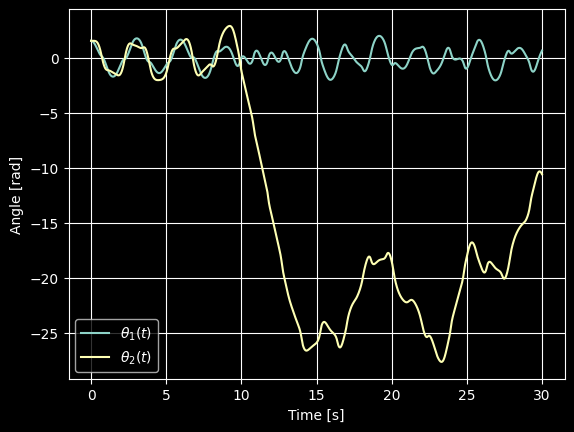

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure()
plt.plot(t, theta1, label=r'$\theta_1(t)$')
plt.plot(t, theta2, label=r'$\theta_2(t)$')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.legend()
plt.grid()
plt.show()
# Plotting the angles over time

In [78]:
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)

x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

omega1 = sol.y[1]
omega2 = sol.y[3]

dx1 = L1 * omega1 * np.cos(theta1)
dy1 = L1 * omega1 * np.sin(theta1)

dx2 = dx1 + L2 * omega2 * np.cos(theta2)
dy2 = dy1 + L2 * omega2 * np.sin(theta2)
# Calculating positions and velocities for animation

In [79]:
T = (
    sp.Rational(1,2) * m1 * (dx1**2 + dy1**2)
  + sp.Rational(1,2) * m2 * (dx2**2 + dy2**2)
)

V = m1 * g * y1 + m2 * g * y2

E = T + V
# Total mechanical energy

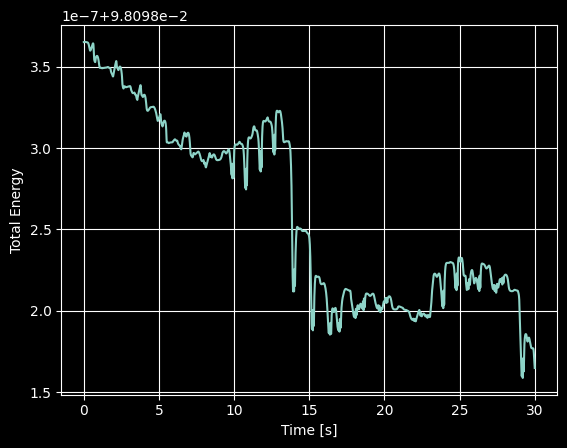

In [ ]:
plt.figure()
plt.plot(t, E)
plt.xlabel('Time [s]')
plt.ylabel('Total Energy')
plt.grid()
plt.show()
# Plotting total energy over time to check conservation

C:\Users\shaur\AppData\Roaming\Python\Python313\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


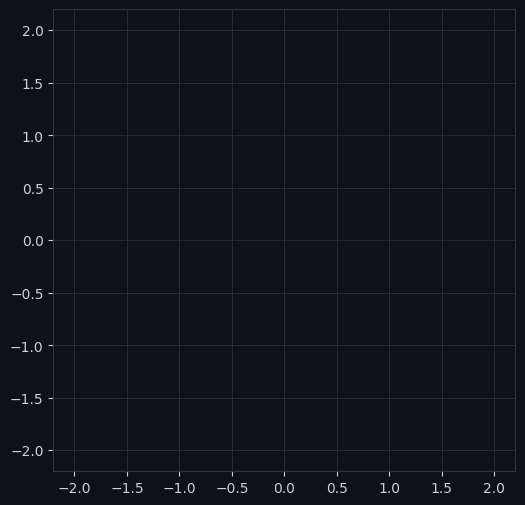

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# reconstruct positions
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

fig, ax = plt.subplots(figsize=(6, 6), facecolor="#0e1117")
ax.set_facecolor("#0e1117")

ax.set_aspect("equal")
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)

ax.grid(color="#2a2f3a", linewidth=0.6)
ax.tick_params(colors="#c9d1d9")
for spine in ax.spines.values():
    spine.set_color("#30363d")


plt.style.use("dark_background")


line, = ax.plot([], [], "o-", lw=2.5, color="#58a6ff")
trace, = ax.plot([], [], lw=1.2, color="#f85149", alpha=0.65)
trail_x, trail_y = [], []

def init():
    line.set_data([], [])
    trace.set_data([], [])
    return line, trace

def update(frame):
    this_x = [0, x1[frame], x2[frame]]
    this_y = [0, y1[frame], y2[frame]]

    line.set_data(this_x, this_y)

    trail_x.append(x2[frame])
    trail_y.append(y2[frame])
    trail_x[:] = trail_x[-300:]
    trail_y[:] = trail_y[-300:]

    trace.set_data(trail_x, trail_y)
    return line, trace

ani = FuncAnimation(
    fig,
    update,
    frames=len(theta1),
    init_func=init,
    interval=30,
    blit=False
)
# To display the animation in a Jupyter notebook



In [ ]:
ani = FuncAnimation(
    fig,
    update,
    frames=len(theta1_vals),
    init_func=init,
    interval=1000 / 60,  # ~60 FPS
    blit=False
)
# To display the animation in a Jupyter notebook

In [44]:
from matplotlib.animation import FFMpegWriter


In [ ]:
writer = FFMpegWriter(fps=60, bitrate=4000)
ani.save("double_pendulum_dark.mp4", writer=writer)
# Saving the animation as an MP4 file